## Implementation of a Classification problem

This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features. I choose Iris dataset because:

- Famous dataset for machine learning because prediction is easy
- Framed as a supervised learning problem: Predict the species of an iris using the measurements
- It already come with scikit-learn For more detail about the dataset visit: http://archive.ics.uci.edu/ml/datasets/Iris. I will download the data and load as csv file.

### 1. Gathering data: 

#### Import libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report 


#### Load dataset Iris and get info

In [8]:
iris = pd.read_csv('Iris.csv')

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 2. Preprocess data

#### Drop column 'Id'

In [9]:
iris.drop(columns='Id', inplace=True) # delete column'Id'
iris.head(10) 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Identify the shape of datatset

In [10]:
iris.shape # View the shape/dimension of the dataset (rows, columns)

(150, 5)

#### Get the list of columns

In [11]:
iris.columns # View list of column names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Missing values

In [12]:
iris.isna().values.any() # Check missing value 

False

#### Get new information from dataset

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Identify duplicate entries/rows

In [14]:
iris[iris.duplicated(keep=False)] # show whole row with duplication

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [15]:
iris[iris.duplicated()] # show only secondary duplicate rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [16]:
iris.duplicated().value_counts() # count the number of data duplication

False    147
True       3
dtype: int64

#### Drop duplicate entries/rows

In [17]:
iris.drop_duplicates(inplace=True) # remove duplication of data
iris.shape

(147, 5)

#### Describe the dataset

In [18]:
iris.describe() # data description

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Correlation Matrix

In [19]:
iris.corr() # correlation between columns

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


#### Data Visualisation

#### Heatmap

<AxesSubplot:>

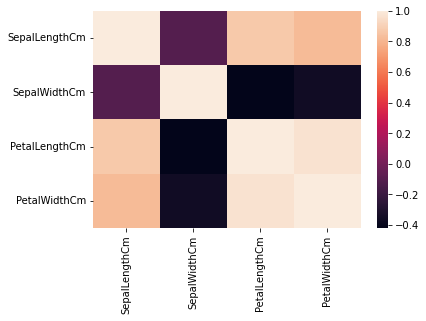

In [21]:
sns.heatmap(data=iris.corr())

#### Bar Plot

In [22]:
iris['Species'].value_counts() # count the number of each species

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

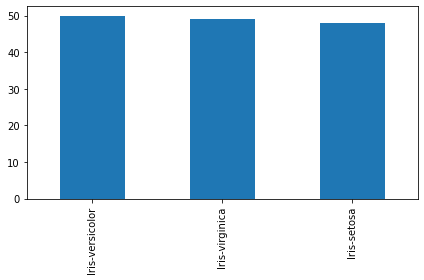

In [23]:
iris['Species'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

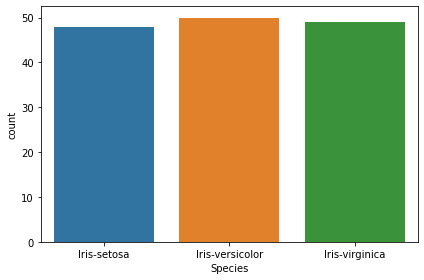

In [24]:
sns.countplot(data=iris, x='Species')
plt.tight_layout()

#### Pie Chart

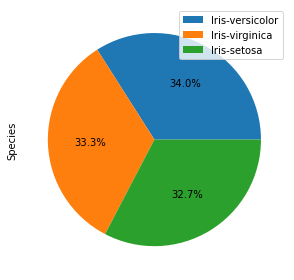

In [25]:
iris['Species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

#### Line Plot

Text(0.5, 1.0, 'Petal Width')

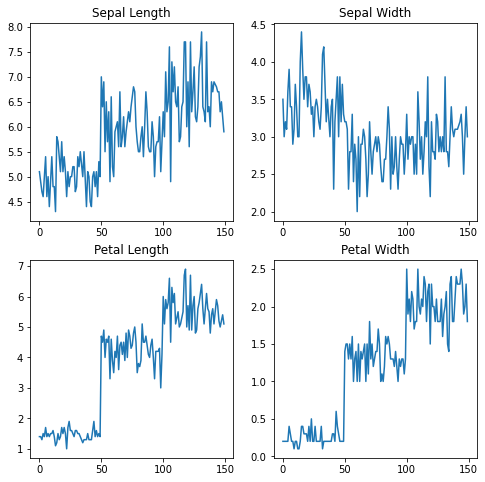

In [26]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

iris['SepalLengthCm'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Sepal Length')

iris['SepalWidthCm'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Sepal Width')

iris.PetalLengthCm.plot.line(ax=ax[1][0])
ax[1][0].set_title('Petal Length')

iris.PetalWidthCm.plot.line(ax=ax[1][1])
ax[1][1].set_title('Petal Width')

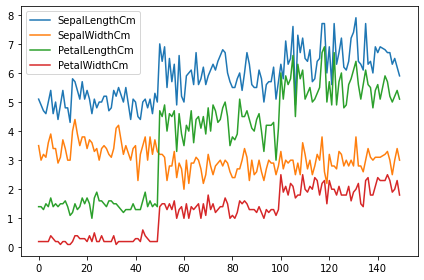

In [27]:
iris.plot()
plt.tight_layout()

#### Histogram

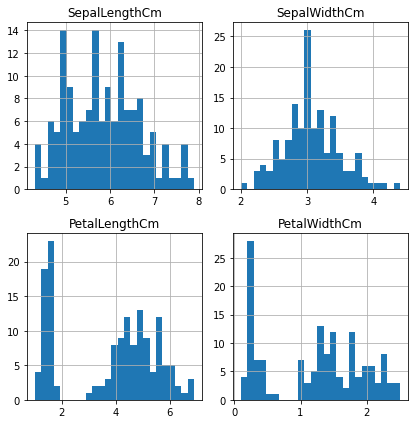

In [28]:
iris.hist(figsize=(6,6), bins=25)
plt.tight_layout()

#### Scatter Plot

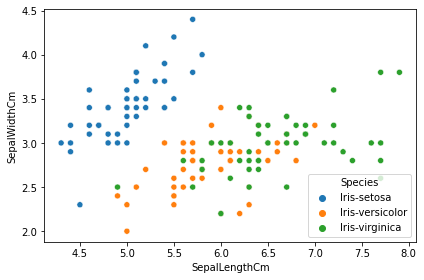

In [29]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species')
plt.tight_layout()

#### Pair Plot

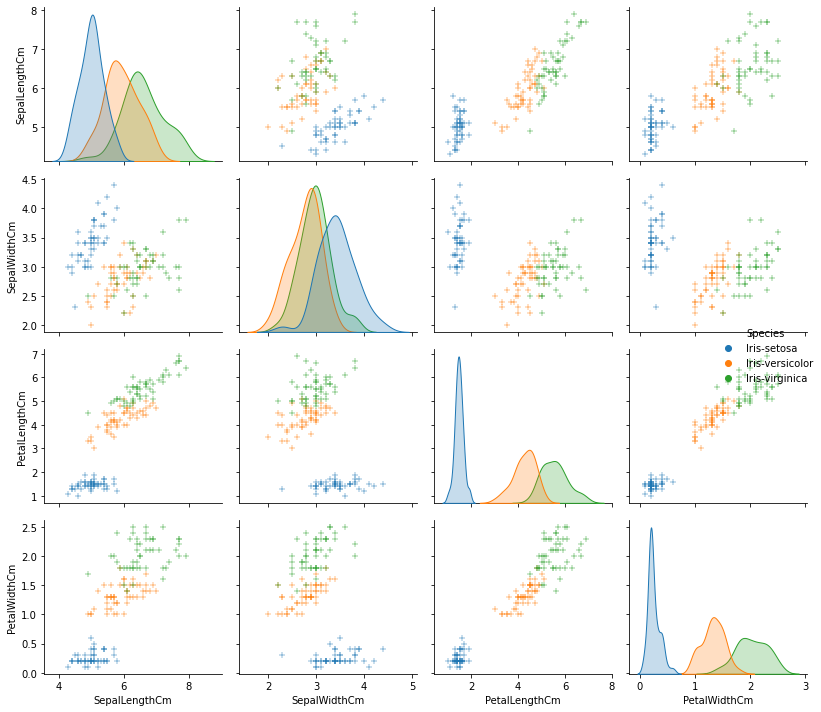

In [30]:
sns.pairplot(iris, hue='Species', markers='+')
plt.tight_layout()

#### Violin Plot

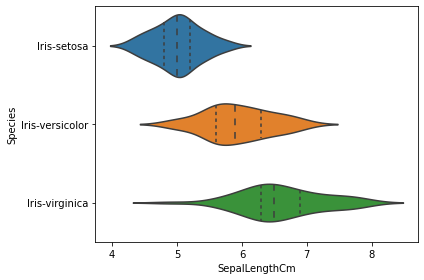

In [31]:
sns.violinplot(data=iris, y='Species', x='SepalLengthCm', inner='quartile')
plt.tight_layout()

#### Dataset: Features & Class Label

In [33]:
X = iris.drop(columns='Species') # put features into variable X
X.head(5) #

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
y = iris['Species'] # put features into variable y
y.head(10) 

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

#### Split the dataset into a training set and a testing set

In [35]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(117, 4)
(117,)

testing dataset:
(30, 4)
(30,)


### 3. Choose a Model
For this particular problem, we are going to use 5 algorithms of supervised learning that can solve classification problems.

#### K Nearest Neighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # Algorithm configuration
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # make predictions
    scores.append(accuracy_score(y_test, y_pred)) # performance evaluation

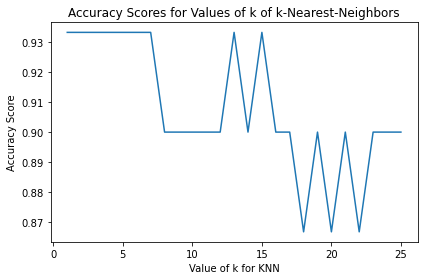

In [38]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [53]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train) # training model/classifier
y1_pred = model_knn.predict(X_test) # make predictions

### 4. Evaluating the model

##### Accuracy Score

In [54]:
print(accuracy_score(y_test, y1_pred)) 

0.9333333333333333


##### Confusion Matrix

In [55]:
print(confusion_matrix(y_test, y1_pred)) # Confusion matrix

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


##### Classification Report

In [56]:
print(classification_report(y_test, y1_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [57]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y2_pred = model_logreg.predict(X_test)

##### Accuracy Score

In [45]:
print(accuracy_score(y_test, y2_pred))

0.9333333333333333


##### Confusion Matrix

In [58]:
print(confusion_matrix(y_test, y2_pred))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


##### Classification Report

In [59]:
print(classification_report(y_test, y2_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



#### Support Vector Classifier

In [48]:
from sklearn.svm import SVC

In [60]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y3_pred = model_svc.predict(X_test)

##### Accuracy Score

In [61]:
print(accuracy_score(y_test, y3_pred))

0.9333333333333333


##### Confusion Matrix

In [62]:
print(confusion_matrix(y_test, y3_pred))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


##### Classification Report

In [63]:
print(classification_report(y_test, y3_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



#### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y4_pred = model_dt.predict(X_test)

##### Accuracy Score

In [66]:
print(accuracy_score(y_test, y4_pred))

0.9666666666666667


##### Confusion Matrix

In [67]:
print(confusion_matrix(y_test, y4_pred))

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


##### Classification Report

In [68]:
print(classification_report(y_test, y4_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



#### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

##### Accuracy Score

In [71]:
print(accuracy_score(y_test, pred_rf))

0.9333333333333333


##### Confusion Matrix

In [72]:
print(confusion_matrix(y_test, pred_rf))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


##### Classification Report

In [73]:
print(classification_report(y_test, pred_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



#### Accuracy comparision for various models.

In [74]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
# 'KNN'- 'LogReg' - 'SVC' - 'DT' - 'RF'   
print(accuracy_scores)

[0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333]
